In [2]:
import pandas as pd
import scipy.io
import numpy as np
import h5py
import pickle
from sklearn.model_selection import train_test_split

X_train = pd.read_pickle('/content/drive/MyDrive/ALS/X_train.pkl')
y_train = pd.read_pickle('/content/drive/MyDrive/ALS/y_train.pkl')
X_test = pd.read_pickle('/content/drive/MyDrive/ALS/X_test.pkl')
y_test = pd.read_pickle('/content/drive/MyDrive/ALS/y_test.pkl')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
np.array(y_train)

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=uint8)

In [ ]:
X_train= np.array(X_train)
X_train= X_train.reshape(X_train.shape[0],X_train.shape[1],1)

X_test= np.array(X_test)
X_test= X_test.reshape(X_test.shape[0],X_test.shape[1],1)

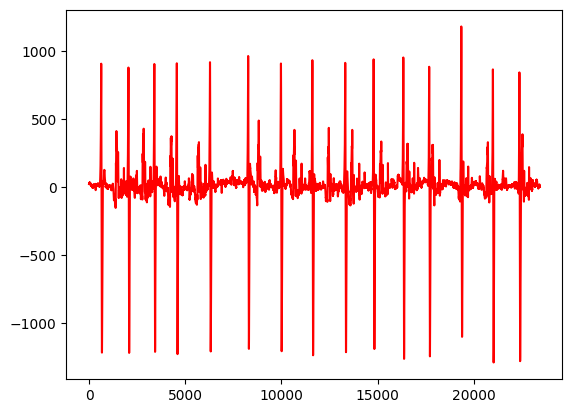

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X_train[0], color="red")

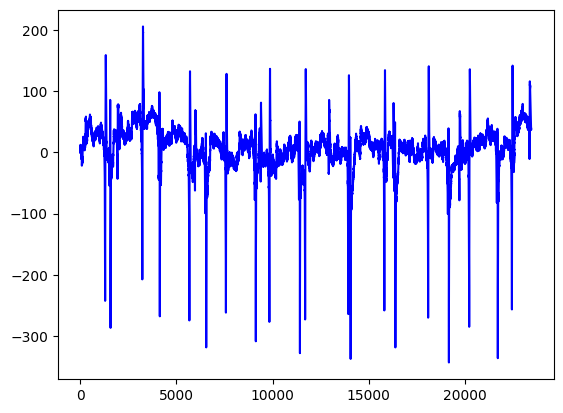

In [ ]:
plt.plot(X_train[1], color="blue")

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC()

In [ ]:
nsamples, nx, ny = X_train.shape
d2_train_dataset = X_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = X_test.shape
d2_test_dataset = X_test.reshape((nsamples,nx*ny))

In [ ]:
clf.fit(d2_train_dataset, y_train.values.ravel())


SVC()

In [ ]:
nsamples, nx, ny = X_test.shape
d2_test_dataset = X_test.reshape((nsamples,nx*ny))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test.values.ravel(), clf.predict(d2_test_dataset)))

0.7518796992481203


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(random_state=0)

In [ ]:
clf.fit(d2_train_dataset, y_train.values.ravel())

RandomForestClassifier(random_state=0)

In [ ]:
print(accuracy_score(y_test.values.ravel(), clf.predict(d2_test_dataset)))

0.7443609022556391


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1)

In [ ]:
clf.fit(d2_train_dataset, y_train.values.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, random_state=1, solver='lbfgs')

In [ ]:
print(accuracy_score(y_test.values.ravel(), clf.predict(d2_test_dataset)))

0.5548872180451128


In [ ]:
# import the library
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# instantiate & fit
bg=BaggingClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=3),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(d2_train_dataset, y_train.values.ravel())
print("score on test: " + str(bg.score(d2_test_dataset, y_test.values.ravel())))


score on test: 0.6857142857142857


In [ ]:
# import the library
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# instantiate & fit
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=3),n_estimators=10,learning_rate=0.5)#0.5,maxdepth 3
adb.fit(d2_train_dataset, y_train.values.ravel())
print("score on test: " + str(adb.score(d2_test_dataset, y_test.values.ravel())))


score on test: 0.7112781954887218


In [ ]:
X_train= np.array(X_train)
X_train= X_train.reshape(X_train.shape[0],X_train.shape[1],1)

X_test= np.array(X_test)
X_test= X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 23437, 1)]        0         
                                                                 
 conv1 (Conv1D)              (None, 23427, 32)         384       
                                                                 
 conv1_bn (BatchNormalizati  (None, 23427, 32)         128       
 on)                                                             
                                                                 
 conv2 (Conv1D)              (None, 23411, 64)         18496     
                                                                 
 conv2_bn (BatchNormalizati  (None, 23411, 64)         256       
 on)                                                             
                                                                 
 conv3 (Conv1D)              (None, 23393, 128)        574

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


45/45 [==============================] - 20s 451ms/step - loss: 0.4255 - val_loss: 0.8077 - lr: 0.0010
Epoch 3/100
45/45 [==============================] - 21s 478ms/step - loss: 0.3708 - val_loss: 0.6573 - lr: 0.0010
Epoch 4/100
45/45 [==============================] - 20s 449ms/step - loss: 0.3744 - val_loss: 0.4213 - lr: 0.0010
Epoch 5/100
45/45 [==============================] - 22s 481ms/step - loss: 0.3469 - val_loss: 0.4035 - lr: 0.0010
Epoch 6/100
45/45 [==============================] - 20s 452ms/step - loss: 0.3096 - val_loss: 0.3628 - lr: 0.0010
Epoch 7/100
45/45 [==============================] - 20s 450ms/step - loss: 0.3257 - val_loss: 0.3508 - lr: 0.0010
Epoch 8/100
45/45 [==============================] - 20s 450ms/step - loss: 0.2796 - val_loss: 0.3410 - lr: 0.0010
Epoch 9/100
45/45 [==============================] - 20s 450ms/step - loss: 0.2577 - val_loss: 0.2950 - lr: 0.0010
Epoch 10/100
45/45 [==============================] - 20s 450ms/step - loss: 0.2481 - val_lo

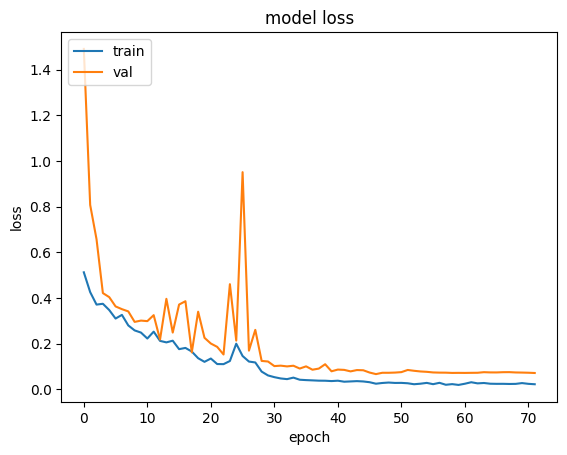

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout, Dense, BatchNormalization, Input, Lambda, Activation, Conv2D, MaxPooling2D, Reshape, Bidirectional, TimeDistributed, GRU, GlobalMaxPooling1D
from keras.layers import concatenate
from keras.models import Model
from keras.utils import plot_model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, CSVLogger, EarlyStopping
from keras.optimizers import Adam




def CNN_fibo():
    input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]),
                        name='input_layer')

    conv1 = Conv1D(filters=32, kernel_size=11, padding='valid', dilation_rate=1, activation='relu',
                   kernel_initializer='he_normal', name='conv1')(input_layer)
    conv1 = BatchNormalization(name='conv1_bn')(conv1)


    conv2 = Conv1D(filters=64, kernel_size=9, padding='valid', dilation_rate=2, activation='relu',
                   kernel_initializer='he_normal', name='conv2')(conv1)
    conv2 = BatchNormalization(name='conv2_bn')(conv2)

    conv3 = Conv1D(filters=128, kernel_size=7, padding='valid', dilation_rate=3, activation='relu',
                   kernel_initializer='he_normal', name='conv3')(conv2)
    conv3 = BatchNormalization(name='conv3_bn')(conv3)



    max_pool = GlobalMaxPooling1D(data_format = 'channels_last')(conv3)
#     flatten_block = Flatten()(max_pool)


    emg_block = Dense(64, activation='relu', name='emg_dense1')(max_pool)
    emg_block = BatchNormalization(name='emg_dense1_bn')(emg_block)

    emg = Dense(1, activation='sigmoid', name='emg')(emg_block)

    model = Model(inputs=input_layer, outputs=emg)

    return model

model= CNN_fibo()

model.summary()



modelWeightPath = '/content/weight.hdf5'
modelLogPath = '/content/trainingLog.csv'

#model.load_weights(modelWeightPath)

lr = 1e-3
opt = Adam(learning_rate=lr, beta_1=0.9,beta_2=0.999, amsgrad= False, epsilon=1e-7)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[])

# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])





## %% training callbacks
trainingCallbacks = []
trainingCallbacks.append(ModelCheckpoint(filepath=modelWeightPath, monitor='val_loss', verbose=0, save_best_only=True))
trainingCallbacks.append(EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=25, verbose=0, mode='auto'))
trainingCallbacks.append(ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_lr=1e-10, mode='auto', min_delta=1e-4, cooldown=0))
trainingCallbacks.append(CSVLogger(modelLogPath, separator=',', append=True))

history= model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=100, batch_size=48, callbacks=trainingCallbacks)



print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('./loss.png')

In [ ]:
plt.savefig('./loss.png')


<Figure size 640x480 with 0 Axes>

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='./model_plot.png', show_shapes=False, show_layer_names=True)
model.save('./ALSNet3.hdf5')

In [ ]:
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout, Dense, BatchNormalization, Input, Lambda, Activation, Conv2D, MaxPooling2D, Reshape, Bidirectional, TimeDistributed, GRU, GlobalMaxPooling1D
from keras.layers import concatenate
from keras.models import Model
from keras.utils import plot_model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, CSVLogger, EarlyStopping
from keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot


# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=1)
yhat_probs= 1-yhat_probs

# measure best fscore
y_test=1-y_test
precision, recall, thresholds = precision_recall_curve(y_test, yhat_probs)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], fscore[ix], precision[ix], recall[ix]))


# predict classes for threshold
yhat_classes = yhat_probs >= 0.5
cm = confusion_matrix(y_test,yhat_classes)
tn, fp, fn, tp = cm.ravel()

model_precision= tp/(tp+fp)
model_recall= tp/(tp+fn)
model_f= 2*model_precision*model_recall/(model_precision+model_recall)

print('Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (0.5, model_f, model_precision, model_recall))
print('Confusion matrix : \n',cm)

21/21 [==============================] - 2s 79ms/step
Best Threshold=0.653366, F-Score=0.986, Precision=0.983, Recall=0.989
Threshold=0.500000, F-Score=0.982, Precision=0.972, Recall=0.992
Confusion matrix : 
 [[300  10]
 [  3 352]]


In [ ]:
model_accuracy= (tp+tn)/(tp+fp+tn+fn)
model_accuracy

0.9804511278195489